In [1]:
#importing
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import acquire

from sklearn.cluster import KMeans
from pydataset import data

from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
#load iris dataset
iris_df = data('iris')

In [3]:
#rename columns for ease of use
iris_df = iris_df.rename(columns={"Sepal.Length": "sepal_length",
                        "Sepal.Width": "sepal_width",
                        "Petal.Length": "petal_length",
                        "Petal.Width": "petal_width",
                        "Species": "species"})

In [4]:
#I might use these features later
iris_df['sepal_area']= iris_df.sepal_length * iris_df.sepal_width
iris_df['petal_area']= iris_df.petal_length * iris_df.petal_width

In [5]:
#split the data into train, validate, test
train_validate, test = train_test_split(iris_df, test_size=.2, random_state=123)

train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [6]:
train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'sepal_area', 'petal_area'],
      dtype='object')

In [7]:
scaler = sklearn.preprocessing.StandardScaler()

cols = ['sepal_length','sepal_width','petal_length','petal_width','sepal_area','petal_area']

train_scaled = train.copy()
validate_scaled = validate.copy()
test_scaled = test.copy()

train_scaled[cols] = scaler.fit_transform(train[cols])
validate_scaled[cols] = scaler.fit_transform(validate[cols])
test_scaled[cols] = scaler.fit_transform(test[cols])

In [8]:
#select features
X = train_scaled[['petal_width', 'sepal_width']]

In [9]:
#let's try 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [10]:
#make a column with these predictions
train_scaled['cluster'] = kmeans.predict(X)
train_scaled.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,cluster
49,-0.669991,1.577809,-1.348985,-1.389832,setosa,0.567251,-1.217276,0
120,0.195844,-1.947084,0.699577,0.395693,virginica,-1.315914,0.376628,2
30,-1.412135,0.402845,-1.290455,-1.389832,setosa,-0.775349,-1.212848,0
52,0.690606,0.402845,0.406925,0.395693,versicolor,0.822844,0.210597,1
115,-0.051538,-0.537127,0.758107,1.631826,virginica,-0.422806,1.425949,1


In [11]:
#let's get the centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_width,sepal_width
0,-1.307423,0.966828
1,0.914071,0.183013
2,0.155334,-1.065860


Text(0.5, 1.0, 'Visualizing Cluster Centers')

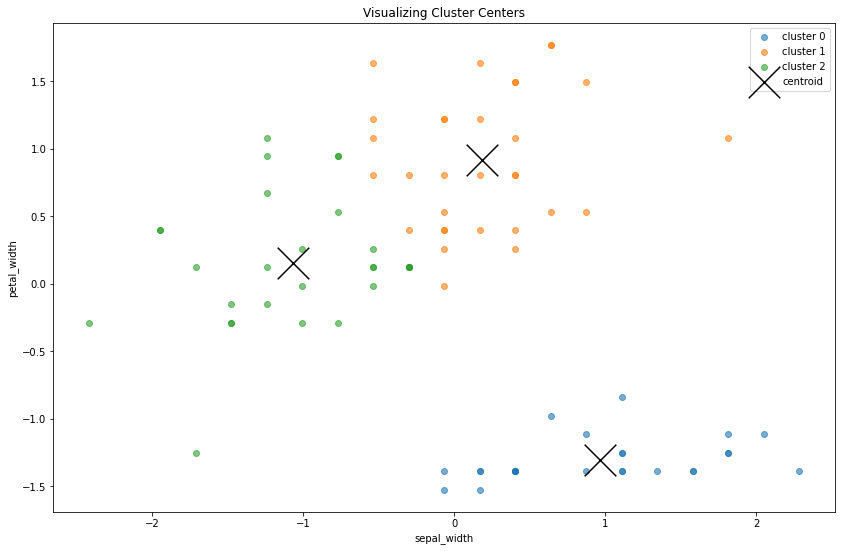

In [12]:
plt.figure(figsize=(14, 9))

for cluster, subset in train_scaled.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

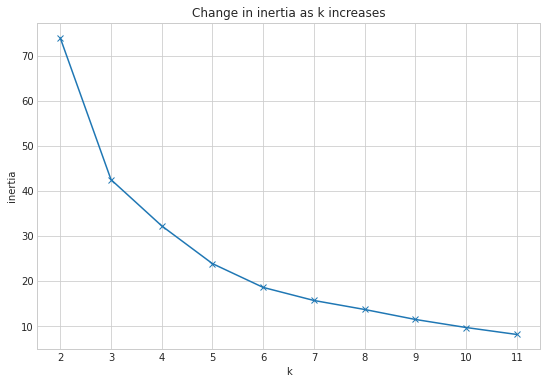

In [13]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [14]:
#elbow is at k=6?

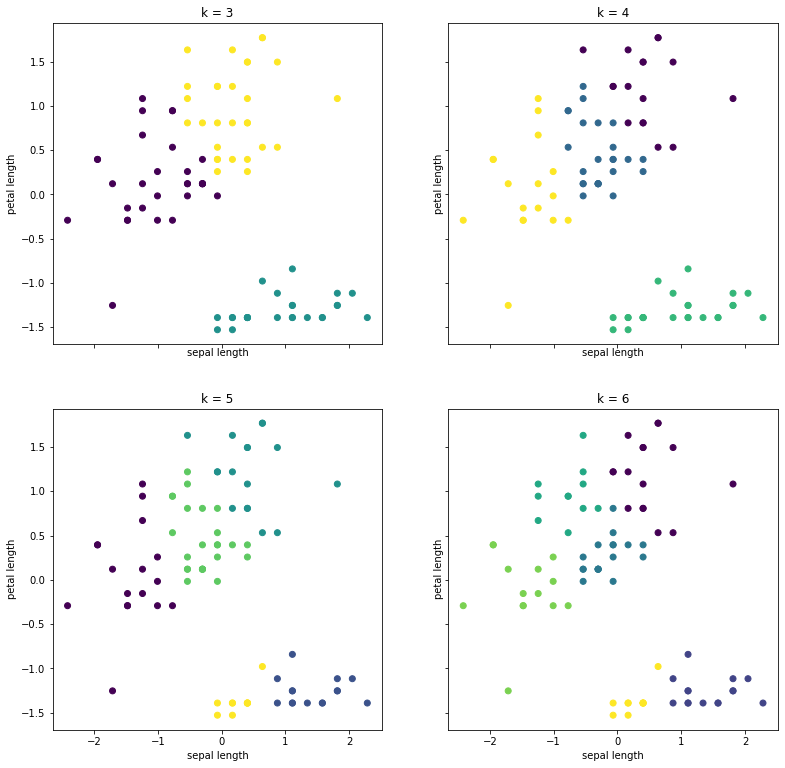

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(3, 7)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')

<br>

Repeat the clustering with THREE different features

In [16]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'sepal_area', 'petal_area'],
      dtype='object')

In [33]:
X = train_scaled[['petal_width', 'sepal_width','petal_length']]

In [34]:
#let's try 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 1, 0,
       1, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2,
       0, 1, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0], dtype=int32)

In [36]:
train_scaled['cluster_2'] = kmeans.predict(X)

In [37]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_width,sepal_width,petal_length
0,0.193711,-0.910350,0.260599
1,-1.307423,0.966828,-1.356009
2,1.043976,0.271249,1.001594


Text(0.5, 1.0, 'Visualizing Cluster Centers')

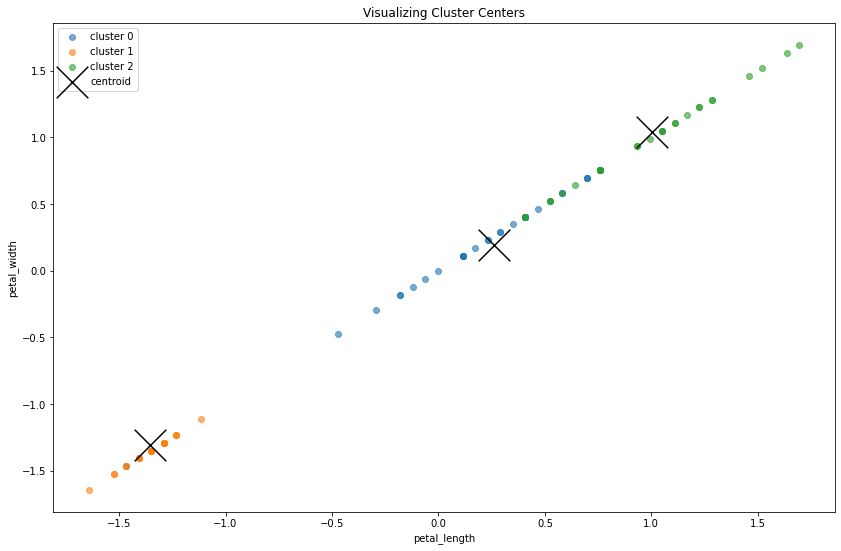

In [39]:
plt.figure(figsize=(14, 9))

for cluster, subset in train_scaled.groupby('cluster_2'):
    plt.scatter(subset.petal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='petal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

Text(0.5, 1.0, 'Visualizing Cluster Centers')

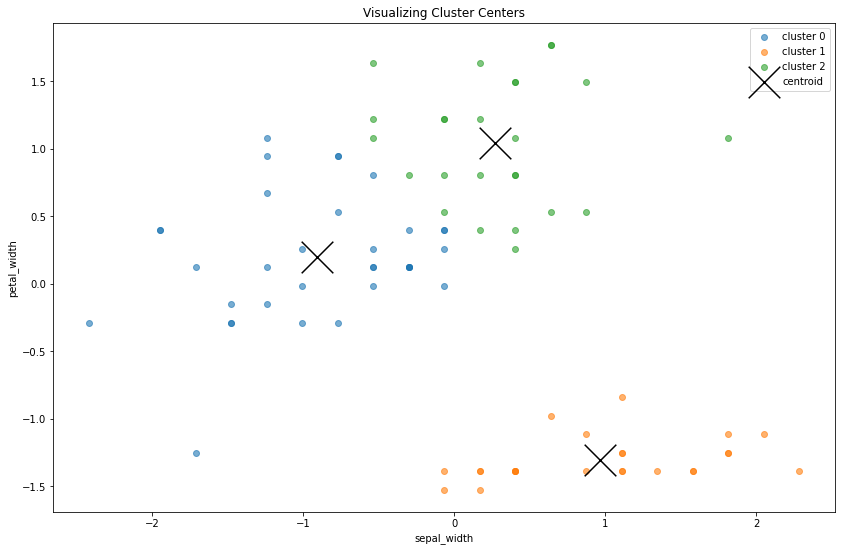

In [41]:
plt.figure(figsize=(14, 9))

for cluster, subset in train_scaled.groupby('cluster_2'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

Text(0.5, 1.0, 'Visualizing Cluster Centers')

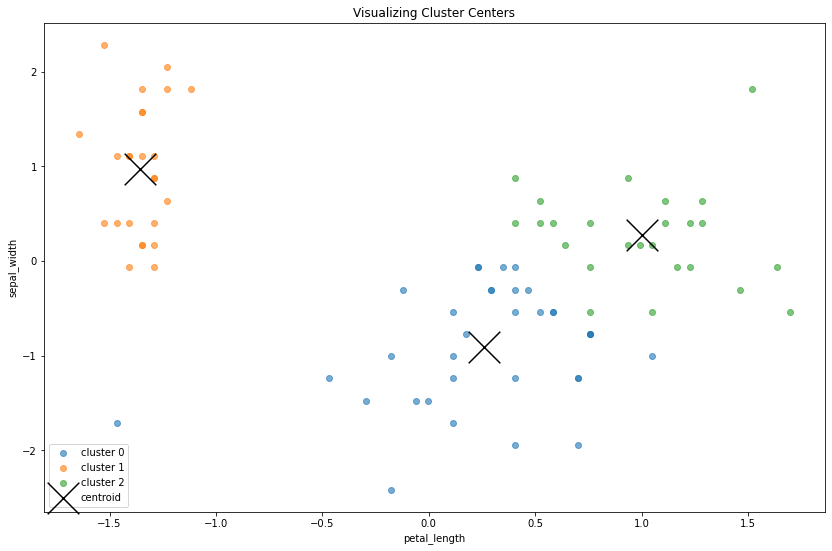

In [42]:
plt.figure(figsize=(14, 9))

for cluster, subset in train_scaled.groupby('cluster_2'):
    plt.scatter(subset.petal_length, subset.sepal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='sepal_width', x='petal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('petal_length')
plt.ylabel('sepal_width')
plt.title('Visualizing Cluster Centers')

In [ ]:
###############

In [ ]:
X_3 = train_scaled[['petal_length', 'petal_width','petal_area']]

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_3)

In [ ]:
train_scaled['cluster_3'] = kmeans.predict(X_3)
train_scaled.sample(5)

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X_3.columns)
centroids

In [ ]:
plt.figure(figsize=(14, 9))

for cluster, subset in train_scaled.groupby('cluster_3'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

2.) Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [ ]:
mall_df = acquire.get_mallcustomer_data()

In [ ]:
mall_df.head()

In [ ]:
mall_df['is_male']= mall_df.gender=='Male'
mall_df.head()

In [ ]:
mall_df = mall_df.replace(to_replace =True,
                 value =1)

In [ ]:
mall_df = mall_df.replace(to_replace =False,
                 value =0)

In [ ]:
mall_df.head()

In [ ]:
mall_df.drop(columns=['gender'])

In [ ]:
train_validate, test = train_test_split(mall_df, test_size=.2, random_state=123)

train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()

cols = ['age','annual_income','is_male']

train_scaled = train.copy()
validate_scaled = validate.copy()
test_scaled = test.copy()

train_scaled[cols] = scaler.fit_transform(train[cols])
validate_scaled[cols] = scaler.fit_transform(validate[cols])
test_scaled[cols] = scaler.fit_transform(test[cols])

In [ ]:
X = train_scaled[['age', 'annual_income']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.predict(X)

In [ ]:
train_scaled['cluster'] = kmeans.predict(X)
train_scaled.sample(5)

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

In [ ]:
plt.figure(figsize=(14, 9))

for cluster, subset in train_scaled.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='annual_income', x='age', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.title('Visualizing Cluster Centers')

3.) How does scaling impact the results of clustering?


In [ ]:
train.head()

In [ ]:
X = train[['age','annual_income']]

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.predict(X)

In [ ]:
train['cluster'] = kmeans.predict(X)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

In [ ]:
plt.figure(figsize=(14, 9))

for cluster, subset in train.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='annual_income', x='age', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.title('Visualizing Cluster Centers')

In [ ]:
#seems more jumbled than if the data were scaled. 